# Causal Forest - HTE

In [4]:
import econml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Simulate Data

In [5]:
import numpy as np
import pandas as pd

np.random.seed(42)
n = 1000

# Features
age = np.random.normal(40, 10, n)
engagement = np.random.uniform(0, 1, n)
X = np.column_stack([age, engagement])

# Treatment assignment (random)
T = np.random.binomial(1, 0.5, n)

# True treatment effect varies by engagement
true_te = 2 + 3 * engagement
Y = true_te * T + age * 0.1 + np.random.normal(0, 1, n)

df = pd.DataFrame({'age': age, 'engagement': engagement, 'T': T, 'Y': Y})
df.head()

,age,engagement,T,Y
0,44.967142,0.167483,0,3.890014
1,38.617357,0.104568,0,4.073019
2,46.476885,0.636430,0,5.847767
3,55.230299,0.706476,0,5.031127
4,37.658466,0.031586,1,3.984052


In [8]:
df['T'].value_counts()

T
0    508
1    492
Name: count, dtype: int64

In [ ]:
from econml.dml import CausalForestDML
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression

est = CausalForestDML(
    model_t=LogisticRegression(),
    model_y=RandomForestRegressor(),
    n_estimators=1000,
    min_samples_leaf=10,
    max_depth=10,
    random_state=42,
    discrete_treatment=True,
)

est.fit(Y, T, X=X)

In [9]:
te_preds = est.effect(X)

# Add to dataframe for inspection
df['CATE'] = te_preds


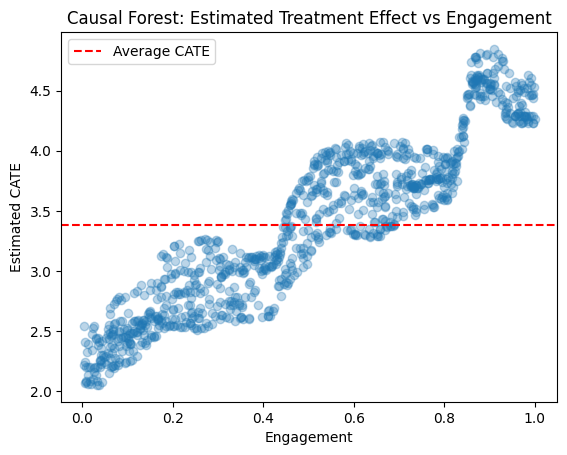

In [10]:
import matplotlib.pyplot as plt

plt.scatter(df['engagement'], df['CATE'], alpha=0.3)
plt.xlabel("Engagement")
plt.ylabel("Estimated CATE")
plt.title("Causal Forest: Estimated Treatment Effect vs Engagement")
plt.axhline(df['CATE'].mean(), color='red', linestyle='--', label='Average CATE')
plt.legend()
plt.show()